# Plot metrics

This notebooks contains some util functions to plot loss curves and other metrics based on the log files.


In [1]:
import json
import matplotlib.pyplot as plt
import os
import pandas as pd

from IPython.display import display_html

from local_python.general_utils import (
    load_model,
    load_pd_from_json,
)


In [5]:
y_lims = [0, 2]
x_lims = [0, 30]

Define all functions


In [3]:
def plot_metrics(
    df_train,
    df_valid=None,
    labels=["Training", "Validation"],
    logy=False,
    num_columns=2,
):
    df_train = df_train.astype(float)
    columns = set(df_train.columns)
    if df_valid is not None:
        df_valid = df_valid.astype(float)
        columns = columns.union(set(df_valid.columns))
    num_rows = int(len(columns) / num_columns) + (0 < len(columns) % num_columns)
    fig, axes = plt.subplots(
        num_rows, num_columns, figsize=(6 * num_columns, 4 * num_rows)
    )
    for i, column in enumerate(columns):
        ax = None
        if (2 <= num_columns) and (2 <= num_rows):
            ax = axes[int(i / num_columns), i % num_columns]
        elif (2 <= num_columns) or (2 <= num_rows):
            ax = axes[i]
        else:
            ax = axes

        ax.title.set_text(column)
        # ax.set_ylim(y_lims)
        ax.set_xlim(x_lims)
        # ax.set_ylim(0, 1 + df_train[column].max())
        df_train[~df_train[column].isna()].plot.line(
            ax=ax,
            y=column,
            label=labels[0],
            logy=logy,
            # NOTE: index is x-axis as default
        )
        if df_valid is not None and column in df_valid.columns:
            df_valid[~df_valid[column].isna()].plot.line(
                ax=ax, y=column, linestyle="-.", label=labels[1], logy=logy
            )
    fig.tight_layout()


def plot_loss_txt(
    path,
    logy=False,
    columns_low=["loss"],
    columns_high=[],
    group_columns=["epoch"],
    num_columns=1,
):
    columns = [*columns_low, *columns_high]
    df = load_pd_from_json(path)
    df_train = df[df["set"] == "train"].groupby(group_columns)[columns].mean()
    df_valid = df[df["set"] == "valid"].groupby(group_columns)[columns].mean()

    for column in columns_low:
        print(
            f"Lowest {column}: {df_valid[column].min()} in epoch {df_valid[column].idxmin()}"
        )
    for column in columns_high:
        print(
            f"Highest {column}: {df_valid[column].max()} in epoch {df_valid[column].idxmax()}"
        )
    plot_metrics(df_train, df_valid, logy=logy, num_columns=num_columns)

archive
Read 20000 entries from loss.txt
Lowest loss: 0.8325856631297793 in epoch 394
concat_0_1
Read 28756 entries from loss.txt
Lowest loss: 0.8110982411437564 in epoch 121
concat_2_1
Read 28440 entries from loss.txt
Lowest loss: 0.8077976985110177 in epoch 119
concat_4_1
Read 15800 entries from loss.txt
Lowest loss: 0.82455589208338 in epoch 51
concat_6_1
Read 12640 entries from loss.txt
Lowest loss: 0.8975227442052629 in epoch 15
logreg_0_1_100
Read 20000 entries from loss.txt
Lowest loss: 0.8325856631297793 in epoch 394
logreg_1
Read 20000 entries from loss.txt
Lowest loss: 0.6604179291613949 in epoch 6697
logreg_2
Read 20000 entries from loss.txt
Lowest loss: 0.4941403138650348 in epoch 9008
lora_2_1
Read 28591 entries from loss.txt
Lowest loss: 1.2081508329936437 in epoch 92
lora_4_1
Read 28260 entries from loss.txt
Lowest loss: 1.1211333206721714 in epoch 57
lora_6_1
Read 9420 entries from loss.txt
Lowest loss: 1.92579642363957 in epoch 15


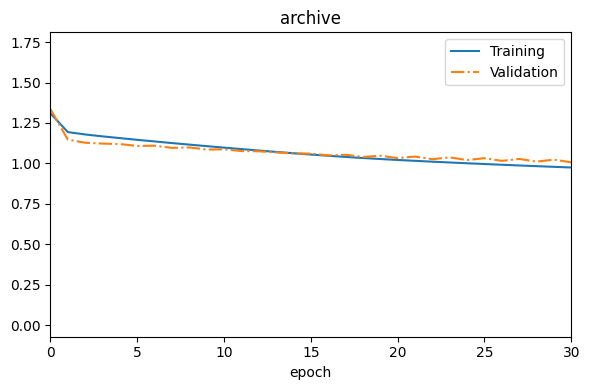

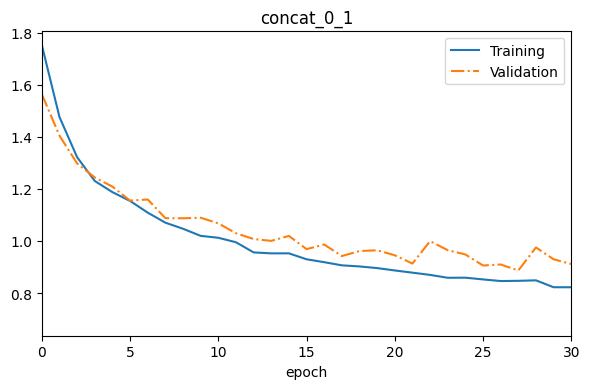

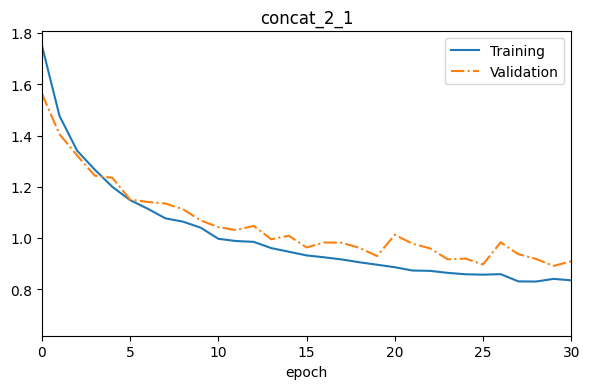

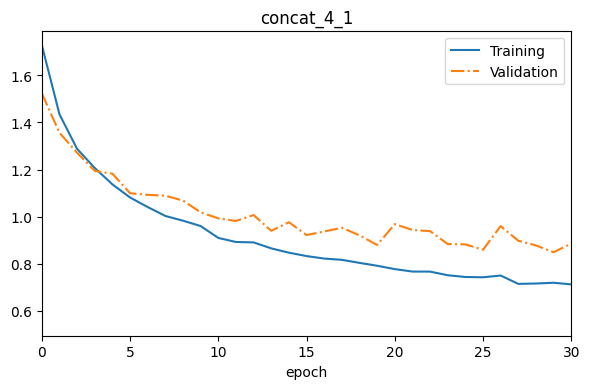

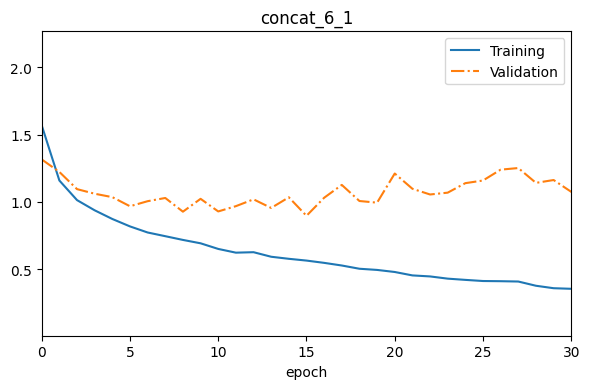

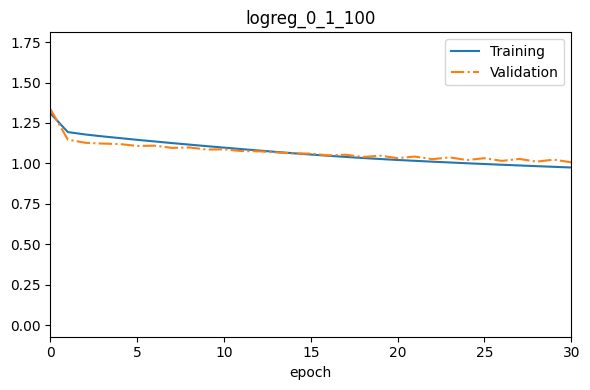

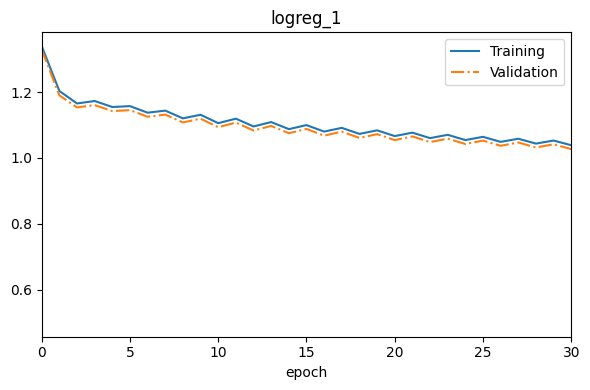

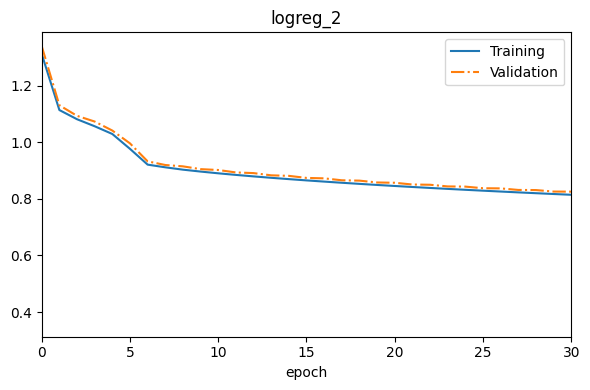

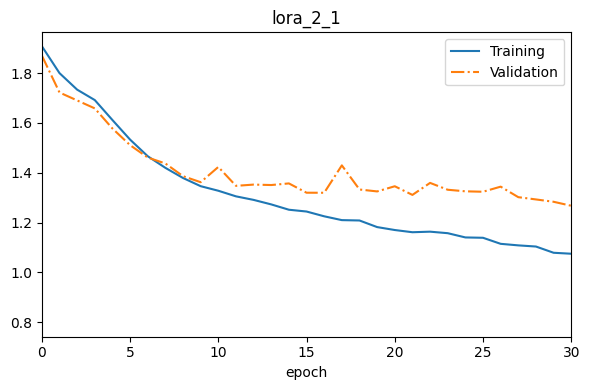

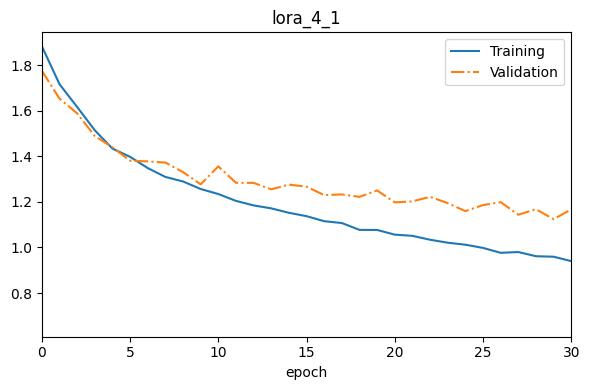

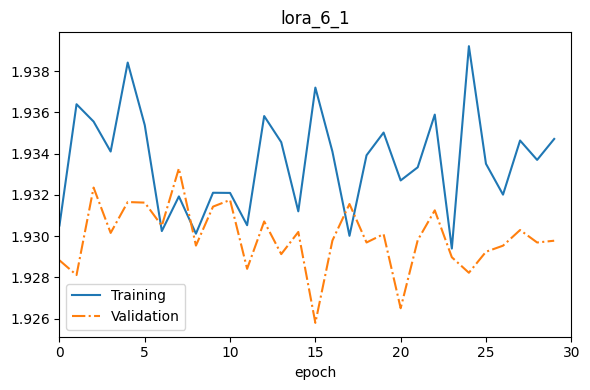

In [9]:
parentdir = "../runs/HAM10000/ViT_T16-ImageNet_1k_SSL_Dino/"
for subdir in os.listdir(parentdir):
    print(subdir)
    plot_loss_txt(os.path.join(parentdir, subdir, "loss.txt"))
    plt.title(subdir)

concat_1_1
Read 4740 entries from loss.txt
Lowest loss: 0.8348154524962107 in epoch 29
concat_2_1
Read 4740 entries from loss.txt
Lowest loss: 0.8347400956683688 in epoch 29
concat_3_1
Read 4740 entries from loss.txt
Lowest loss: 0.8295611474249098 in epoch 29
concat_4_1
Read 4740 entries from loss.txt
Lowest loss: 0.8004583583937751 in epoch 29
lora_1_1
Read 9420 entries from loss.txt
Lowest loss: 1.3702846356800624 in epoch 29
lora_2_1
Read 9420 entries from loss.txt
Lowest loss: 1.3144772461482457 in epoch 29
lora_3_1
Read 9420 entries from loss.txt
Lowest loss: 1.2915042400360108 in epoch 26
lora_4_1
Read 9420 entries from loss.txt
Lowest loss: 1.2514011774744307 in epoch 29


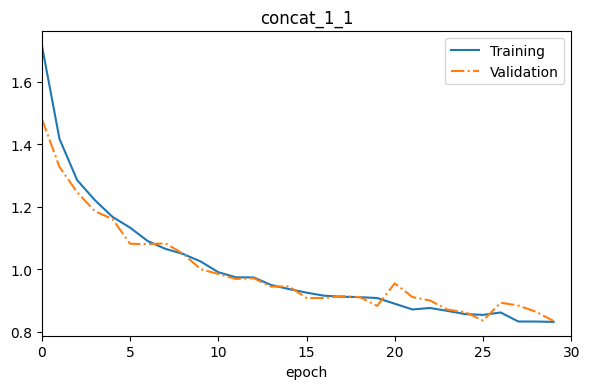

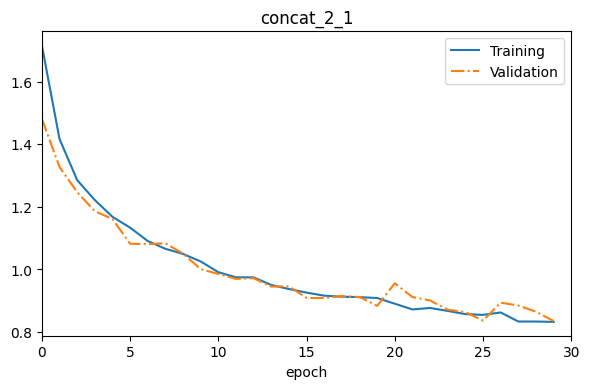

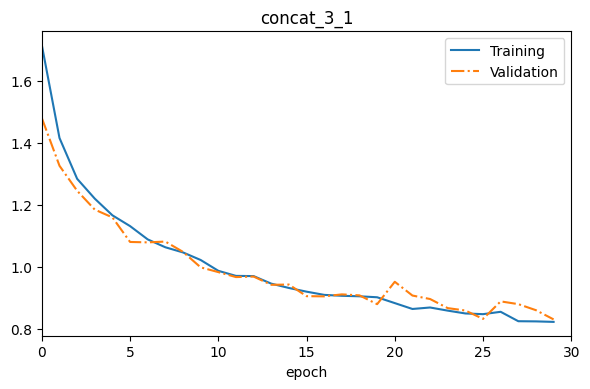

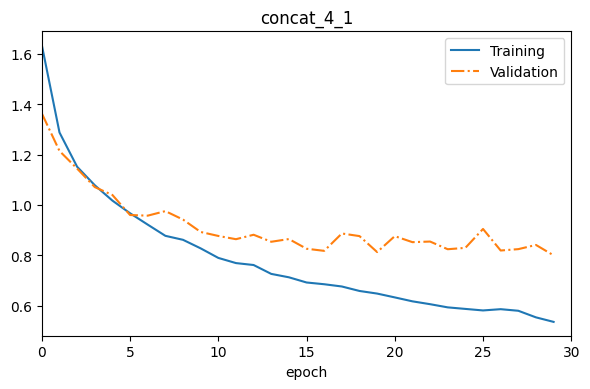

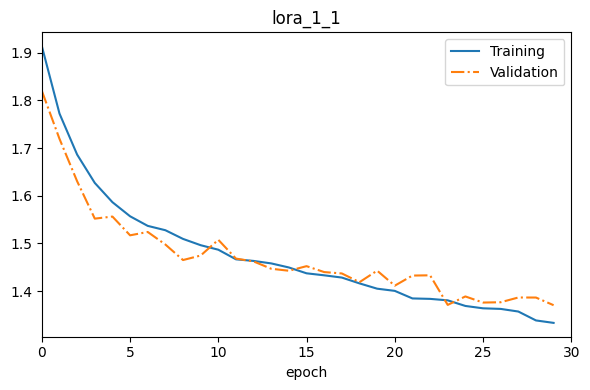

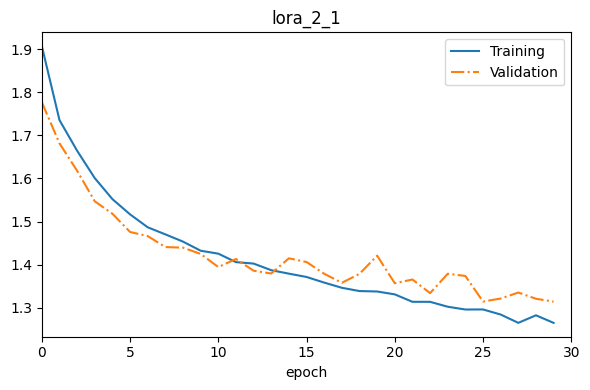

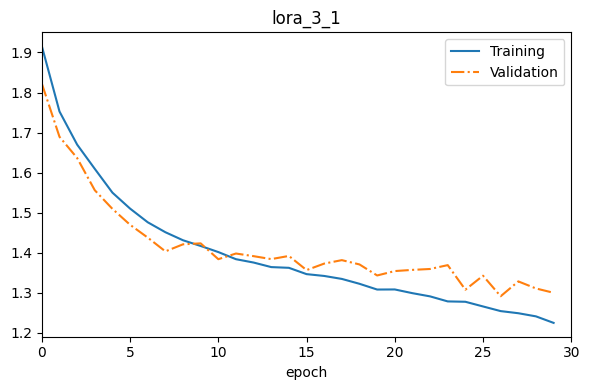

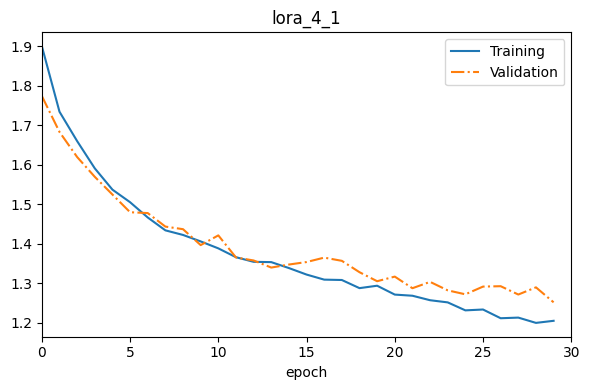

In [8]:
columns_high = ["f1_macro"]
columns_low = ["loss"]

parentdir = "../runs/HAM10000/ViT_T16-Plant_SSL_Dino/"
for subdir in os.listdir(parentdir):
    print(subdir)
    plot_loss_txt(os.path.join(parentdir, subdir, "loss.txt"))
    plt.title(subdir)

In [13]:
# parentdir = "../runs/HAM10000/"
# for subdir in os.listdir(parentdir):
#     loss_path = os.path.join(parentdir, subdir, "loss.txt")
#     if os.path.exists(loss_path):
#         plot_loss_txt(loss_path)
#         plt.title(subdir)

Read 20000 entries from loss.txt
Lowest loss: 0.8417142903266706 in epoch 77
Highest f1_macro: 0.6228442831831089 in epoch 573


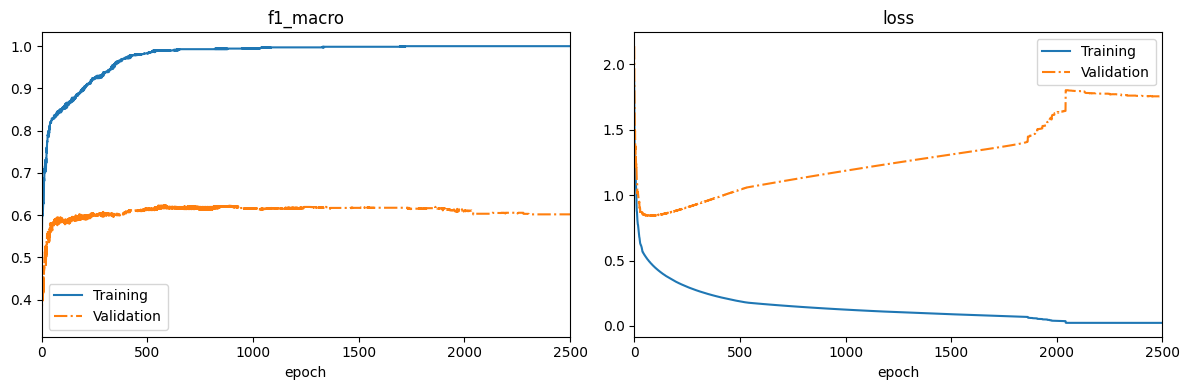

In [26]:

plot_loss_txt(
    "../runs/HAM10000/ViT_T16-Derma/logreg_0_1_100/loss.txt",
    columns_low=columns_low,
    columns_high=columns_high,
    num_columns=2,
)

Read 20000 entries from loss.txt
Lowest loss: 0.8230186849929865 in epoch 200
Highest f1_macro: 0.6049411851312924 in epoch 4724


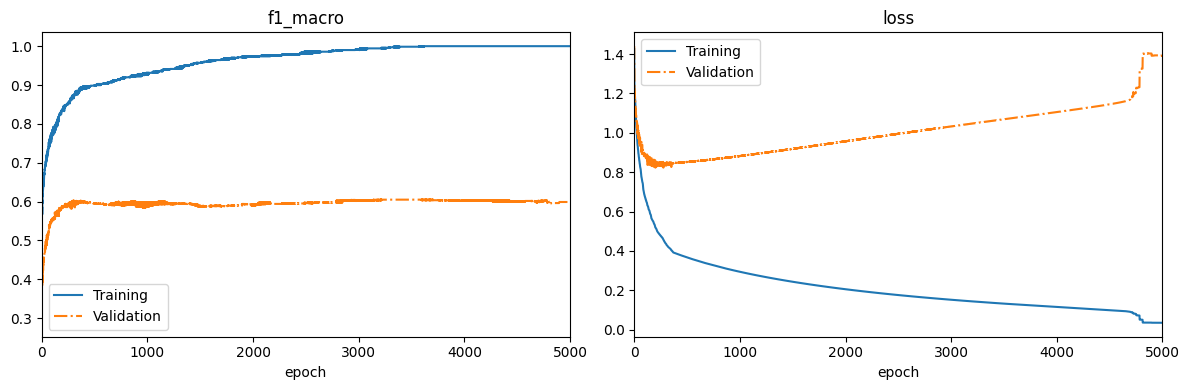

In [30]:
plot_loss_txt(
    "../runs/HAM10000/ViT_T16-Plant/logreg_0_1_100/loss.txt",
    columns_low=columns_low,
    columns_high=columns_high,
    num_columns=2,
)

Read 20000 entries from loss.txt
Lowest loss: 0.4941403138650348 in epoch 9008
Highest accuracy: 0.8268359020852222 in epoch 8548
Highest balanced_accuracy: 0.658404562145833 in epoch 9273
Highest f1_weighted: 0.8201018361506983 in epoch 8548
Highest f1_micro: 0.8268359020852223 in epoch 8548
Highest f1_macro: 0.6752730399605904 in epoch 9273


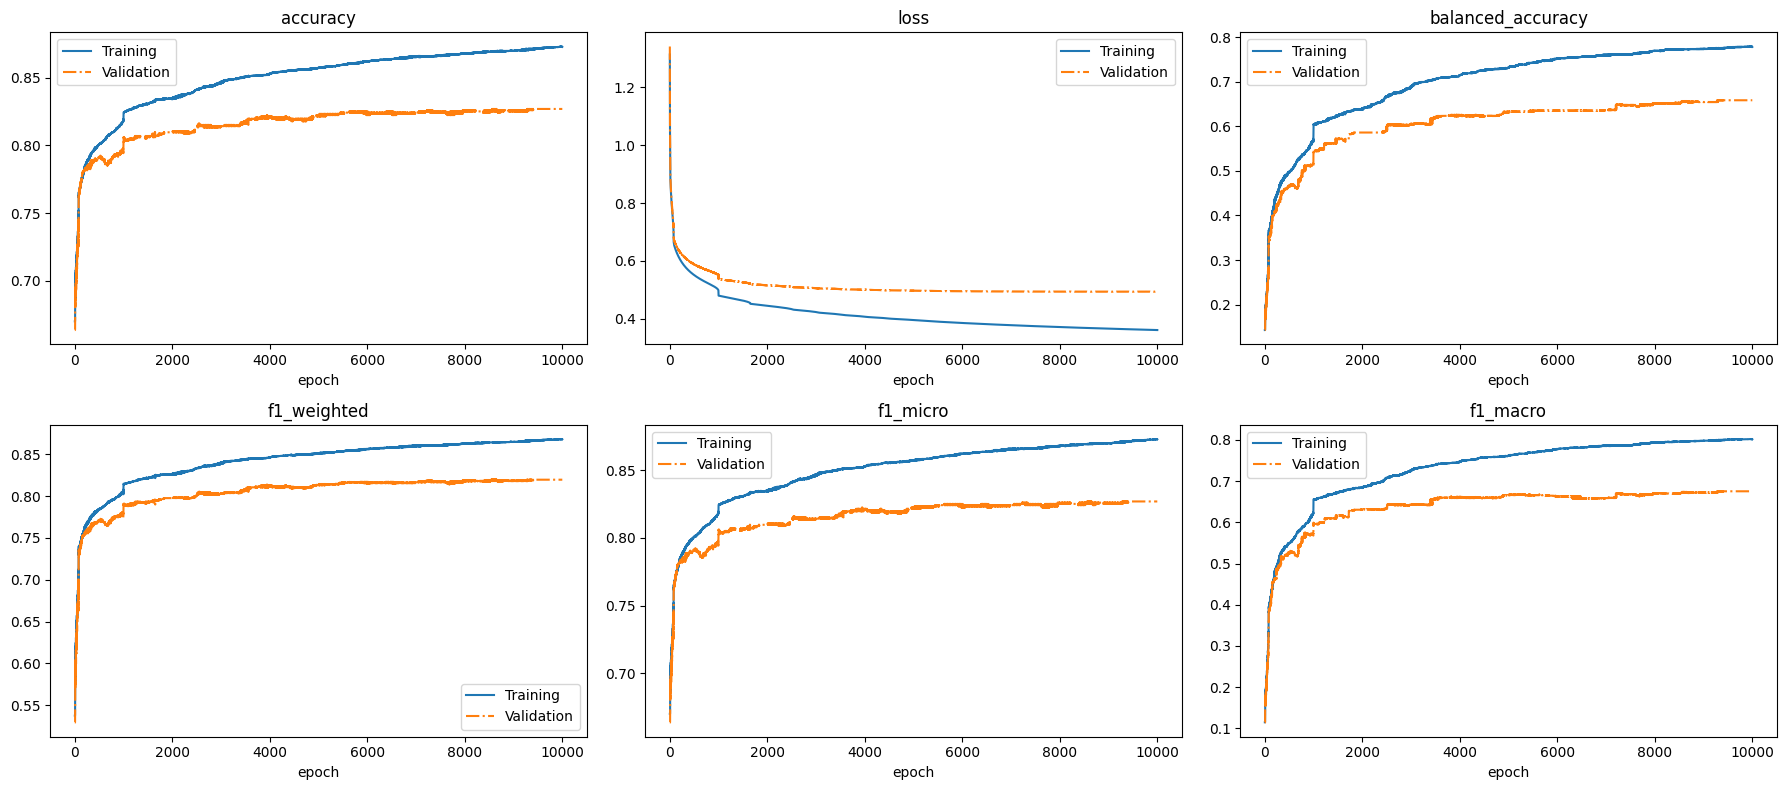

In [27]:
plot_loss_txt(
    "../runs/HAM10000/ViT_T16-ImageNet_1k_SSL_Dino/logreg_2/loss.txt",
    columns_high=columns_high,
    num_columns=3,
)

Read 7400 entries from loss.txt
Lowest loss: 2.0632492661476136 in epoch 49


Text(0.5, 1.0, 'Total loss of PDDD ResNet50 with PlantDoc dataset')

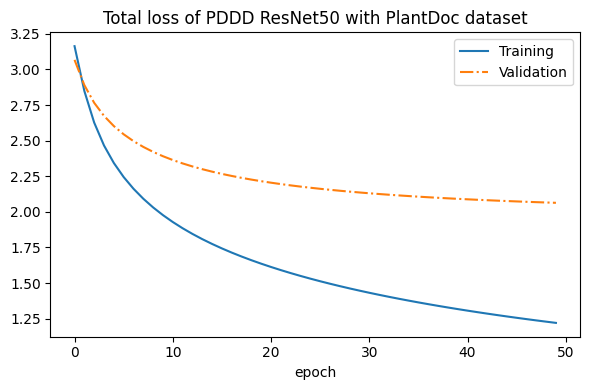

In [10]:
columns = ["loss"]

plot_loss_txt(
    "../runs/ResNet50_PlantDoc/loss.txt",
    columns_low=columns,
    num_columns=len(columns),
)
plt.title("Total loss of PDDD ResNet50 with PlantDoc dataset")

In [ ]:
def display_side_by_side(dfs, captions=[]):
    html_string = ""
    for i, df in enumerate(dfs):
        styler = df.style.set_table_attributes("style='display:inline'")
        if i < len(captions):
            styler.set_caption(captions[i])
        html_string += styler.to_html()
    display_html(html_string, raw=True)

In [ ]:
y_column = "loss"
x_column = "epoch"
fig, ax = plt.subplots()
plt.figure()
for set_name in df_metrics["set"].unique():
    df_metrics[df_metrics["set"] == set_name].plot.line(
        y=y_column, x=x_column, label=set_name, ax=ax
    )
plt.show()